#Assignment 3

## 1.Download the Dataset:
https://drive.google.com/file/d/1xkynpL15pt6KT3YSlDimu4A5iRU9qYck/view


In [1]:
#Importing packages 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow.keras.preprocessing import image
import numpy as np

## 2.Image Augmentation

In [2]:
#Creating augmentation on training variable
train_flower=idg(rescale=1./255 ,zoom_range=0.2,horizontal_flip=True)

#Passing Training data to the variable
X_Train = train_flower.flow_from_directory('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4327 images belonging to 5 classes.


In [3]:
# Creating augmentation on testing variable
test_flowers=idg(rescale=1./255)

# Passing testing data to test variable
X_test = test_flowers.flow_from_directory('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4327 images belonging to 5 classes.


# 3.Create Model and Add Layers


In [4]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

# 4.Compile the Model

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


# 5.Fit the Model

In [6]:
model.fit_generator(X_Train,steps_per_epoch= len(X_Train),epochs=10,validation_data=X_test,validation_steps=len(X_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
44/44 [==============================] - 60s 1s/step - loss: 1.7098 - accuracy: 0.3823 - val_loss: 1.1192 - val_accuracy: 0.5463
Epoch 2/10
44/44 [==============================] - 56s 1s/step - loss: 1.0966 - accuracy: 0.5660 - val_loss: 1.0546 - val_accuracy: 0.5983
Epoch 3/10
44/44 [==============================] - 56s 1s/step - loss: 0.9941 - accuracy: 0.6087 - val_loss: 0.9571 - val_accuracy: 0.6335
Epoch 4/10
44/44 [==============================] - 56s 1s/step - loss: 0.9242 - accuracy: 0.6404 - val_loss: 0.9112 - val_accuracy: 0.6503
Epoch 5/10
44/44 [==============================] - 56s 1s/step - loss: 0.8808 - accuracy: 0.6580 - val_loss: 0.8956 - val_accuracy: 0.6584
Epoch 6/10
44/44 [==============================] - 56s 1s/step - loss: 0.8210 - accuracy: 0.6843 - val_loss: 0.8476 - val_accuracy: 0.6811
Epoch 7/10
44/44 [==============================] - 56s 1s/step - loss: 0.7780 - accuracy: 0.7109 - val_loss: 0.8316 - val_accuracy: 0.6936
Epoch 8/10
44/44 [==

# 6.Save the model

In [7]:
model.save('Flower.h5')


# 7.Test the model

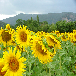

In [8]:
#Testing 1st image
img1=image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers/sunflower/200557977_bf24d9550b.jpg',target_size=(76,76))
img1

In [9]:
x=image.img_to_array(img1)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
X_Train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'sunflower'

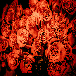

In [10]:
#Testing 2nd image
img2=image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/flowers/rose/10503217854_e66a804309.jpg',target_size=(76,76))
img2

In [11]:
x=image.img_to_array(img2)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
X_Train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'rose'